In [1]:
import pandas as pd
data = pd.read_csv('D:/iris.csv', sep=',')
data = data.drop(columns = ['Unnamed: 0'])

In [2]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Ngasih label 0 = setosa, 1 = versicolor, 2 = virginica
from sklearn.preprocessing import LabelEncoder
data['Label'] = LabelEncoder().fit_transform(data['Species'])

In [4]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [5]:
from sklearn.model_selection import train_test_split
# Definisi Y
y = data['Label']

# Definisi X
X = data.drop(['Species','Label'], axis=1)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [6]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [7]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [8]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.9642857142857143

In [9]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
# get the species names
species = data['Species'].unique()

# create an empty dictionary for confusion matrices
conf_matrix = {}

# add new keys and assign the confusion matrices results
for name in classif_name:
    conf_matrix[name] = pd.DataFrame(data=confusion_matrix(y_test, y_predict[name]), 
                                     columns=species, 
                                     index=species)

In [11]:
conf_matrix['NB']

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,8,0
virginica,0,2,12


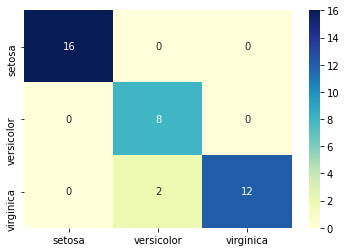

In [12]:
# create heatmap for NB confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix['NB'], annot=True, cmap="YlGnBu")
plt.show()

In [13]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9474


In [18]:
data1 = pd.read_csv('D:/playtennis.csv', sep=',')

In [19]:
data1.head()

,outlook,temp,humidity,windy,play
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes


In [23]:
from sklearn.preprocessing import LabelEncoder
data1['Label_outlook']=LabelEncoder().fit_transform(data1['outlook'])
data1['Label_temp']=LabelEncoder().fit_transform(data1['temp'])
data1['Label_humidity']=LabelEncoder().fit_transform(data1['humidity'])
data1['Label_windy']=LabelEncoder().fit_transform(data1['windy'])
data1['Label_play']=LabelEncoder().fit_transform(data1['play'])

In [24]:
data1.head()

,outlook,temp,humidity,windy,play,Label_outlook,Label_temp,Label_humidity,Label_windy,Label_play
0,rainy,hot,high,False,no,1,1,0,0,0
1,rainy,hot,high,True,no,1,1,0,1,0
2,overcast,hot,high,False,yes,0,1,0,0,2
3,sunny,mild,high,False,yes,2,2,0,0,2
4,sunny,cool,normal,False,yes,2,0,1,0,2


In [63]:
from sklearn.model_selection import train_test_split
# Definisi Y
y = data1['Label_play']

# Definisi X
X = data1.drop(['outlook','temp','humidity','windy','play','Label_play'],axis=1)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [64]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [65]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [66]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.9

In [67]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
# get the species names
namaplay = data1['play'].unique()
print(namaplay[:2])

['no' 'yes']


In [69]:
# create an empty dictionary for confusion matrices
confix_matrix = {}

In [49]:
data1.dtypes

outlook           object
temp              object
humidity          object
windy               bool
play              object
Label_outlook      int32
Label_temp         int32
Label_humidity     int32
Label_windy        int32
Label_play         int32
dtype: object

In [70]:
# add new keys and assign the confusion matrices results
for name in classif_name:
    confix_matrix[name] = pd.DataFrame(data=confusion_matrix(y_test, y_predict[name]), columns=namaplay[:2], index=namaplay[:2])

In [71]:
confix_matrix['NB']

,no,yes
no,0,2
yes,0,2


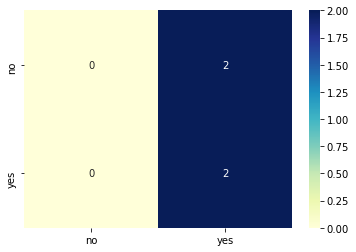

In [72]:
# create heatmap for NB confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confix_matrix['NB'], annot=True, cmap="YlGnBu")
plt.show()

In [73]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.5000
